# Задачи с ограничениями в виде равенств и неравенств
Базовая задача оптимизации описывается как
$$
\begin{array}{ll}
\mbox{минимизировать } & f(x), \\
\mbox{при условии } & x\in \mathcal{D}.
\end{array}\tag{1}
$$
В большинстве случаев множетсво $\mathcal{D}$, на котором происходит поиск минимума, может быть представлено в виде функциональных равенств и неравенств
$$
\mathcal{D}=\{x~|~g(x)\leq 0\}\cap\{x~|~h(x)= 0\}\cap\{x~|~q(x)< 0\}
$$
Строгие неравенства обычно не рассматриваются, так как имеет меньшую интерпретируемость, обычно вместо них используются нестрогие. Для ограничений в виде равенств и неравенств выработан обширный математический аппарат, начинающийся с метода множителей Лагранжа и развивающийся в теорию двойственности. Начнем с простой универсальной теоремы, обобщающей теорему Ферма.

<b>Теорема (условия стационарности)</b>. Пусть в задаче $(1)$ множество $\mathcal{D}$ выпукло, $x^*$ -- точка минимума $f$ на $\mathcal{D}$, функция $f$ дифференцируема в точке $x^*$, тогда
$$
\nabla f(x^*)^T(x-x^*)\geq 0,~~\forall x\in \mathcal{D}.
$$
<i>Замечание.</i> Если $x^*$ -- внутренняя точка, то условие вырождается в 
$$
\nabla f(x^*)=0
$$

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["text.usetex"] = True

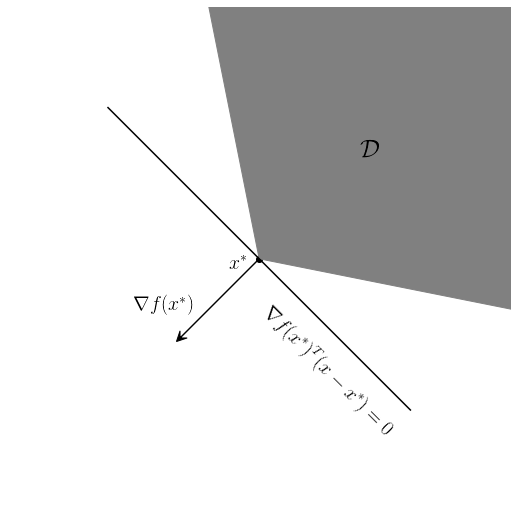

In [2]:
def show_constraints():
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1]) 
    
    ax.set_xlim((-5, 5))
    ax.set_ylim((-5, 5))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
        
    plt.fill([0, 5, 5, -1], [0, -1, 5, 5], color='grey')
    plt.plot([-3, 3], [3, -3], color='black')
    plt.text(2, 2, r"$\mathcal{D}$", fontsize=25)
    plt.text(0, -3.5, r"$\nabla f(x^*)^T(x-x^*)=0$", rotation=-45, fontsize=20)
    plt.scatter([0], [0], color='black')
    plt.text(-0.6, -0.2, "$x^*$", fontsize=20)
    ax.arrow(0, 0, -1.5, -1.5, head_width=0.2, head_length=0.2, 
             overhang=0.5, fc='k', ec='k', color='blue')
    plt.text(-2.5, -1.0, r"$\nabla f(x^*)$", fontsize=20)
        
    plt.close(fig)
    return fig

show_constraints()

<b> Доказательство. </b> Предположим, что есть точка $x\in\mathcal{D}$ такая, что $\nabla f(x^*)^T(x-x^*)<0$, тогда в силу дифференцируемости $f$ при достаточно малых $\alpha>0$ получаем
$$
\begin{array}{rl}
f(x^*+\alpha (x-x^*))-f(x^*)&=\alpha\nabla f(x^*)^T(x-x^*)+o(\alpha||x-x^*||) \\
&\leq \alpha \nabla f(x^*)^T(x-x^*)+\alpha ||x-x^*||\left(\frac{-\nabla f(x^*)^T(x-x^*)}{2||x-x^*||}\right) \\
&\leq \frac{\alpha}{2}\nabla f(x^*)^T(x-x^*)<0.
\end{array}
$$
Так как $x, x^*\in\mathcal{D}$, $\mathcal{D}$ -- выпукло, то при $0<\alpha<1$ точка $x^*+\alpha(x-x^*)$ также принадлежит $\mathcal{D}$. $\#$

<b>Следствие (теорема о разделяющей гипперплоскости)</b>. Функция
$$
d_y(x)=\|x-y\|^2
$$
дифференцируема, если множество $\mathcal{D}$ выпукло и замкнуто, то существует точка минимума $d_y$ на $\mathcal{D}$. В силу условий стационарности получаем
$$
\nabla d_y(x^*)^T(x-x^*) =2(x^*-y)^T(x-x^*)\geq 0~~\forall x\in\mathcal{D},
$$
т.е. $\mathcal{D}$ лежит по одну сторону от гиперплоскости с нормалью $x^*-y$, проходящую через точку $x^*$. C другой стороны 
$$
(x^*-y)^T(y-x^*)=-\|x^*-y\|^2<0
$$
т.е. точка $y$ лежит по другую сторону от гиперплоскости. Чтобы доказать аналогичное утверждение для двух выпуклых множеств $\mathcal{D}, \mathcal{K}$, достаточно применить полученное утверждение к $d_{y^*}$ на множвестве $\mathcal{D}$ и к $d_{x^*}$ на множестве $\mathcal{K}$, где
$$
x^*, y^*=argmin_{x\in\mathcal{D}, y\in\mathcal{K}}\|x-y\|^2~\#
$$

## Метод множителей Лагранжа
Исторически первым методом решения задач оптимизации с ограничениями был предложен Лагранжем для ограничений в виде равенств. Чтобы понять суть метода давайте рассмотрим задачу с линейными ограничениями
$$
\begin{array}{ll}
\mbox{минимизировать } & f(x), \\
\mbox{при условии } & Ax=b.
\end{array}\tag{2}
$$
Пусть $p_1, \ldots, p_m$ -- базис $\ker A$, т. е. $Ap_i=0$ и при этом если $Ay=0$, то $y$ -- линейная комбинация $p_i$. Тогда пространство $Ax=b$ можно параметризовать как 
$$
x=x_0+Pz
$$
где $Ax_0=b$, $P$ -- матрица, составленная из столбцов $p_i$. Так как $Ap_i=0$, то $A(x_0+Pz)=Ax_0+APz=Ax_0=b$. Задача (2) таким образом превращается в задачу безусловной оптимизации
$$
f(x_0+Pz)\rightarrow_z \min
$$
Используя условия стационарности для точки минимума $z^*$ получаем
$$
\nabla_z f(x_0+Pz^*)=\nabla f(x_0+Pz^*)P=0. \\
$$
Таким образом мы получили, что в задаче с линейными ограничениями градиент в оптимальной точке должен быть ортогонален линейному пространству, порожденному этими ограничениями. По построению любой вектор $x:~P^Tx=0$ представляется в виде $x=A^T\lambda$ так как $AP=0$. Таким образом в итоге имеем, что для точки минимума $x^*$ в задаче (2) найдется такой вектор $\lambda$, что
$$
\nabla f(x^*)=A^T\lambda.
$$
Вышеописанная логика обобщается и до нелинейных ограничений, так как носит локальный характер. Вектор $\lambda$ принято называть <b>множителями Лагранжа</b>. Рассмотрим теперь задачу с нелинейными ограничениями

$$
\begin{array}{ll}
\mbox{минимизировать } & f(x), \\
\mbox{при условии } & g(x)=0.
\end{array}\tag{3}
$$

<b>Определение</b>. функцией Лагранжа (или лагранжианом) соответствующей задаче (3) называется функция
$$
L(\lambda, x)=f(x)+\lambda^T g(x).
$$

<b>Теорема (метод множителей Лагранжа)</b>.
$f:\mathbb{R}^n\rightarrow\mathbb{R}, g:\mathbb{R}^n\rightarrow\mathbb{R}^m$ - дифференцируемые функции, $x^*$ - точка минимума задачи (3) и векторы $\nabla g_i (x^*)$ линейно независимы, тогда существует такой вектор $\lambda=(\lambda_1, \lambda_2, \ldots, \lambda_m)^T$, что
$$
\nabla_x L(\lambda, x^*)=0_n.
$$

<b>Доказательство</b>. В силу независимости $\nabla g_i (x^*)$ можем воспользоваться теоремой о неявном отображении, таким образом существует $\varphi:\mathcal{K}\subset\mathbb{R}^{n-m}\rightarrow\mathbb{R}^n$ такая, что выполняется
$$
\begin{cases}
\varphi(0)=x^*\\
g(\varphi(z))=0~~\forall z,
\end{cases}
$$
и при этом столбцы $\nabla \varphi(0)$ линейно независимы. Последнее условие выполняется для такой $\varphi$, которая полностью покрывает поверхность $g(x)=0$ вблизи $x^*$. Без этого последнего условия можно было бы взять например $\varphi(z)=x^*$, обычно подразумевается, что $\varphi(z)=(z_1, \ldots, z_{n-m}, \varphi_{n-m+1}(z),\ldots, \varphi_n(z))^T$ и таким образом $\nabla\varphi(z)$ имеет диагональный единичный блок размера $n-m$, что гарантирует линейную независимость.
Отметим, что
$$
0=\left.\nabla_z[g(\varphi(z))]\right|_{z=0}=\nabla g(x^*)\nabla \varphi(0).
$$
Так как строки $\nabla g(x^*)$ линейно независимы ($m$ строк), столбцы $\nabla \varphi(0)$ линейно независимы ($n-m$ столбцов), то получается, что столбцы $\nabla \varphi(0)$ образуют базис ортогонального дополнения линейной оболочки строк $\nabla g(x^*)$ и наоборот, т. е. любой вектор $h:~~h\nabla \varphi(0)=0$ имеет вид $h=\lambda^T \nabla g(x^*)$. Наконец применяя условия стационарности к $f(\varphi(z))$ получаем
$$
0=\left.\nabla_z(f(\varphi(z))\right|_{z=0}=\nabla f(x^*)\nabla \varphi(0)
$$
в силу чего существует вектор $\lambda\in \mathbb{R}^m$ такой, что
$$
0=\nabla f(x^*)-\lambda^T\nabla g(x^*)=\nabla_x L(-\lambda, x^*)~~\#
$$

<i>Пример 1.</i> Рассмотрим задачу
$$
\begin{array}{ll}
\mbox{минимизировать } & x+y, \\
\mbox{при условии } & x^2+y^2=a^2.
\end{array}
$$
Лагранжиан
$$
F(x,y,\lambda)=x+y-\lambda(x^2+y^2-a^2).
$$
Дифференцируем
$$
\begin{array}{rl}
1-2\lambda x=0,\\
1-2\lambda y=0.
\end{array}
$$
Из этих уравнений следует, что $\lambda\neq 0$. Вычитая первое из второго получаем
$$
2\lambda(x-y)=0\Rightarrow x=y.
$$
Подставляя в исходное уравнение получаем $x=\pm\frac{a}{\sqrt{2}}$. При этом, если $a=0$, то $x=0$ и условия стационарности не выполняются ни при каком $\lambda$.

<i>Пример 2 (Расстояние от точки до гиперплоскости)</i>. Рассмотрим задачу
$$
\begin{array}{ll}
\mbox{минимизировать } & ||x-y||^2=\sum_{k=1}^n(x_k-y_k)^2,\\
\mbox{при условии }    & a^Tx=c.
\end{array}
$$
Функция Лагранжа имеет вид
$$
L(\lambda, x)=||x-y||^2-\lambda(a^Tx-c).
$$
Получаем необходимые условия
$$
2(x-y)-\lambda a=0.
$$
Разрешим относительно $x$
$$
x=\frac{\lambda a}{2}+y.
$$
Подставляем в уравнение гиперплоскости
$$
\frac{\lambda a^Ta}{2}+a^Ty=c,~~
\lambda = 2\frac{c-a^Ty}{a^Ta},
$$
$$
x=y+a\frac{c-a^Ty}{a^Ta}.
$$
И наконец, квадрат расстояния равен
$$
||x-y||^2=(a^Ta) \frac{\lambda^2}{4}=(a^Ta)\frac{(c-a^Ty)^2}{(a^Ta)^2}=\frac{(c-a^Ty)^2}{(a^Ta)}
$$

## Ограничения в виде неравенств и условия Каруша-Куна-Такера 
Метод множителей Лагранжа можно интерпретировать следующим образом: каждое ограничение убирает одно направление, вдоль которого можно двигаться, оставаясь в множестве, заданном ограничениями, что ослабляет ограничение на $\nabla f(x^*)$. В случае ограничений в виде неравенств схожая интерпретация приводит к следующим двум случаям 

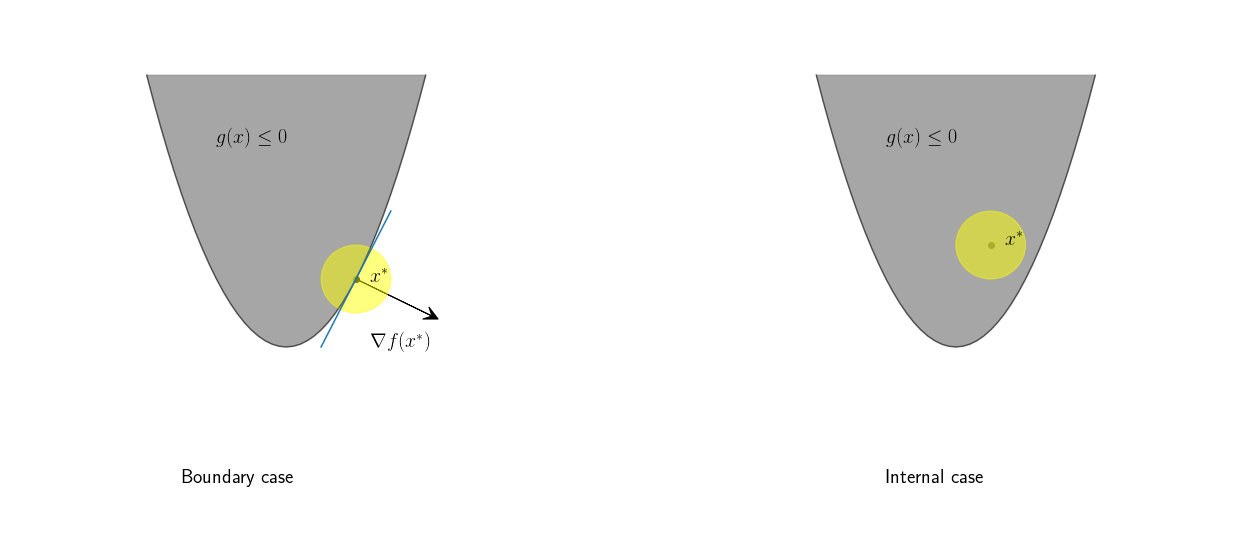

In [3]:
import numpy as np

def show_inequality_cases():
    fig, axs = plt.subplots(1, 2, figsize=(22, 10)) 
    
    for ax in axs:
        ax.set_xlim((-4, 4))
        ax.set_ylim((-3, 5))
    
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        for name, spine in ax.spines.items():
            spine.set_visible(False)
            spine.set_visible(False)
        
    f = lambda x: x ** 2
    r = np.arange(-2, 2+0.1, 0.1)
        
    axs[0].fill(r, [f(t) for t in r], color='grey', alpha=0.7)
    axs[0].plot(r, [f(t) for t in r], color='black', alpha=0.5)
    
    axs[0].scatter([1], [f(1)], color='black')
    axs[0].text(1+0.2, f(1)-0.05, "$x^*$", fontsize=20)
    axs[0].arrow(1, f(1), 1, -0.5, head_width=0.2, head_length=0.2, 
             overhang=0.5, fc='k', ec='k', color='blue')
    axs[0].text(1+0.2, f(1)-1, r"$\nabla f(x^*)$", fontsize=20)
    axs[0].text(-1, 3, r"$g(x)\leq 0$", fontsize=20)
    axs[0].text(-1.5, -2, r"Boundary case", fontsize=20)
    axs[0].plot([0.5, 1.5], [1 - 0.5 * 2, 1 + 0.5 * 2])
    
    circ = plt.Circle((1,1),0.5, alpha=0.5, color='yellow')
    axs[0].add_artist(circ)
    
    axs[1].fill(r, [f(t) for t in r], color='grey', alpha=0.7)
    axs[1].plot(r, [f(t) for t in r], color='black', alpha=0.5)
    
    axs[1].scatter([0.5], [1.5], color='black')
    axs[1].text(0.5+0.2, 1.5, "$x^*$", fontsize=20)
    axs[1].text(-1, 3, r"$g(x)\leq 0$", fontsize=20)
    axs[1].text(-1.0, -2, r"Internal case", fontsize=20)
    
    circ = plt.Circle((0.5,1.5),0.5, alpha=0.5, color='yellow')
    axs[1].add_artist(circ)
    plt.close(fig)
    return fig

show_inequality_cases()

<b> Теорема (условия ККТ)</b>. Пусть $\mathcal{D}\subset \mathbb{R}^n$, $\mathcal{D}$ открыто, $f:\mathcal{D}\rightarrow \mathbb{R}$, $g:\mathcal{D}\rightarrow \mathbb{R}^m$, $h:\mathcal{D}\rightarrow \mathbb{R}^k$ -- непрерывно дифференцируемые функции. Рассмотрим задачу
$$
\begin{array}{ll}
\mbox{минимизировать } & f(x),\\
\mbox{при условии }    & g(x)\leq 0_m,\\
      & h(x)=0_k.
\end{array}\tag{4}
$$
При выполнении некоторых условий регулярности (например, $\nabla g_i(x^*), \nabla h_i(x^*)$ линейно независимы), если $x^*$ является решением задачи, тогда существует вектора $\lambda\in\mathbb{R}^m$ и $\mu\in\mathbb{R}^k$ такие что выполняются следующие условия:
$$
\begin{array}{ll}
\mbox{1. Стационарность: }& \nabla f(x^*) + \lambda^T\nabla g(x^*)+\mu^T \nabla h(x^*)=0_n.\\
\mbox{2. Прямая выполнимость: }&g(x^*)\leq 0_m,~h(x^*)=0_k.\\
\mbox{3. Двойственная выполнимость: }&\lambda\geq 0_m~(\leq 0_m \mbox{ для задачи максимизации}).\\
\mbox{4. Дополняющая нежесткость: }& \lambda_i g_i(x^*)=0,~1\leq i\leq m.
\end{array}
$$
Доказательство позже через субградиент.

## Двойственность
По аналогии с (3) можно ввести лагранжиан для (4) как
$$
L(x, \lambda, \mu)=f(x)+\lambda^Tg(x)+\mu^Th(x).
$$
<b>Определение. </b> Двойственной к (4) функцией называется
$$
q(\lambda, \mu) = \inf_{x\in \mathcal{D}}L(x, \lambda, \mu).
$$
Двойственной задачей к (4) называется задача
$$
\begin{array}{ll}
\mbox{максимизировать } &~ q(\lambda, 
\mu) \\
\mbox{при условии } &~ \lambda\geq 0. \\
\end{array}\tag{5}
$$
Стоит отметить, что (5) струуктурно проще, чем (4), более того $q$ - вогнутая функция, соответственно (5) является выпуклой задачей, даже если (4) не является. Важная связь между (4) и (5) заключается в том, что если $x^*$ - решение (4), а $\lambda^*, \mu^*$ - решение (5), то 
$$
q(\lambda^*, \mu^*)\leq f(x^*).
$$
Это свойство обычно называют <i>слабой двойственностью</i>. В силу определения $q$, если $x, \lambda, \mu$ удовлетворяют прямым и двойственном ограничениям, то
$$
f(x)\geq f(x)+\underbrace{\lambda^Tg(x)}_{\leq 0}+\underbrace{\mu^Th(x)}_{=0}\geq \inf_{x\in\mathcal{D}}L(x, \lambda, \mu)=q(\lambda, \mu).
$$

Если же при этом выполняется
$$
q(\lambda^*, \mu^*)= f(x^*),
$$
то это называют <i>сильной двойственностью</i>. В отдельных случаях можно решить двойственную задачу, минимум $L(x, \lambda^*, \mu^*)$ совпадает с минимумом (4). Если к примеру $L$ имеет единственную точку минимума, то для решения (4) достаточно найти минимум $L(x, \lambda^*, \mu^*)$. Для выпуклых задач наиболее распространненым критерием сильной двойственности является условие Слейтера.

<b>Теорема (условие Слейтера)</b>. Пусть $f:\mathcal{D}\subset\mathbb{R}^n\rightarrow\mathbb{R}, g:\mathcal{D}\subset\mathbb{R}^n\rightarrow\mathbb{R}^m$ - выпуклые функции, существует точка $x$ такая, что $g(x)<0$, тогда для задачи
$$
\begin{array}{ll}
\mbox{минимизировать } &~ f(x)\\
\mbox{при условии } &~ g(x)\leq 0 \\
&~Ax=b
\end{array}
$$
Выполняется сильная двойственность (без доказательства).

<i>Пример 1 (линейное программирование)</i>. Рассмотрим задачу линейного программирования
$$
\begin{array}{ll}
\mbox{минимизировать } &~ c^Tx\\
\mbox{при условии } &~ Ax=b \\
&~x\geq 0
\end{array}
$$
Лагранжиан для этой задачи
$$
L(x, \lambda, \mu)=c^Tx+\lambda^T(Ax-b)-\mu^Tx
$$
Двойственная функция
$$
q(\lambda, \mu)=
\begin{cases}
-\infty, & c+A^T\lambda-\mu\neq 0 \\
-\lambda^Tb, &c+A^T\lambda-\mu=0
\end{cases}
$$
учитывая это двойственная задача имеет вид
$$
\begin{array}{ll}
\mbox{максимизировать } &~ -\lambda^Tb\\
\mbox{при условии } &~ c+A^T\lambda-\mu=0 \\
&~\mu\geq 0
\end{array}
$$

<i>Пример 2 (задача о кратчайшем пути)</i>. Задача о кратчайших путях может быть представлена в виде задачи линейного программирования если сформулировать её в виде потока минимальной стоимости без ограничений на пропускные способности. Пусть $B$ - матрица инцидентности графа, т. е.
$B_{ij}=-1$ если ребро $j$ выходит из вершины $i$, $B_{ij}=1$ если ребро $j$ входит в $i$, $0$ в остальных случаях. Пусть 
$$
\chi^{st}_i=
\begin{cases}
-1,& i=s\\
1,& i=t \\
0,& i\neq s,t.
\end{cases}
$$
длины ребер заданы вектором $c$, тогда задача о кратчайшем пути из $s$ в $t$ может быть сформулирована следующим образом
$$
\begin{array}{ll}
\mbox{минимизировать } &~ c^Tx\\
\mbox{при условии } &~ Bx=\chi^{st} \\
&~x\geq 0.
\end{array}
$$
Посмотрим на двойственную задачу
$$
\begin{array}{ll}
\mbox{максимизировать } &~ -\lambda^T\chi^{st}\\
\mbox{при условии } &~ c+B^T\lambda-\mu=0 \\
&~\mu\geq 0
\end{array}
$$
Здесь можно избавиться от $\mu$ и воспользовавшись определением $B,\chi^{st}$ немного переписать задачу
$$
\begin{array}{ll}
\mbox{максимизировать } &~ \lambda_s-\lambda_t\\
\mbox{при условии } &~ \lambda_i-\lambda_j\leq c_{ij}.
\end{array}
$$
Эта задача имеет очень интересную интерпретацию: пусть вершины графа - это какие-то маленькие объекты, ребра представляют собой нитки той длины, которая задана графом. Теперь эту конструкцию мы начинаем тянуть влево за вершину $t$ и вправо за вершину $s$, в результате конструкция растянется ровно вдоль кратчайшего пути из $s$ в $t$.

In [4]:
import cvxpy as cp

In [5]:
arcs = [
    (0, 1, 4),
    (0, 2, 2),
    (1, 2, 5),
    (2, 3, 3),
    (1, 4, 10),
    (3, 4, 4),
    (4, 5, 11)
]
s, t = 0, 5

In [6]:
nodes = list(set([arc[0] for arc in arcs]) | set([arc[1] for arc in arcs]))
node_idx = {x:i for i, x in enumerate(nodes)}
n = len(nodes)
m = len(arcs)

In [7]:
B = np.zeros((n, m)) # incidence matrix
c = np.array([arc[2] for arc in arcs])
for i, arc in enumerate(arcs):
    B[node_idx[arc[0]], i] = -1
    B[node_idx[arc[1]], i] = 1

chi = np.zeros(n)
chi[node_idx[s]] = -1
chi[node_idx[t]] = 1

In [8]:
x = cp.Variable(m)
objective = cp.Minimize(c.T @ x)
constraints = [0 <= x, B @ x == chi]
prob = cp.Problem(objective, constraints)

In [9]:
prob.solve()
print(x.value)
print(constraints[0].dual_value)
print(constraints[1].dual_value)

[ 5.37776190e-10  9.99999999e-01 -5.68070542e-10  9.99999999e-01
  1.10640509e-09  9.99999999e-01  1.00000000e+00]
[3.22037075e+00 2.15657775e-09 3.77962925e+00 5.14317590e-10
 1.77962925e+00 5.14317792e-10 3.84041992e-09]
[  6.12993821   5.35030896   4.12993821   1.12993821  -2.8700618
 -13.8700618 ]


In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from graph_utils.graph import Graph, Arc

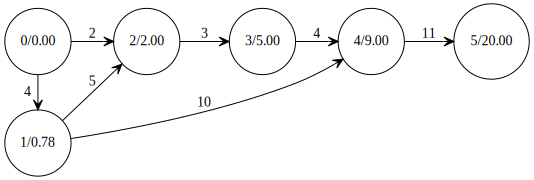

In [11]:
eps=1e-6

graph = Graph([Arc(arc[0], arc[1], arc[2], attributes={"constraint":str(constraints[0].dual_value[i] < eps)}) for i, arc in enumerate(arcs)])
graph.Visualize([f"{constraints[1].dual_value[s] - x:.2f}" for x in constraints[1].dual_value])